**第7周作业（编程部分)**

In [1]:
# author:
# update: 

1. 以下是8大行星到太阳的平均距离与公转周期的测量数据。 通过数据拟合， 验证**开普勒第三定律** (又称调和定律， 或周期定律): 绕以太阳为焦点的椭圆轨道运行的所有行星，其椭圆轨道半长轴的立方与周期的平方之比是一个常量。 
   
    (1) 先取靠近太阳最近的4个行星的数据进行拟合；

    (2) 取全部8个行星的数据拟合。

    | 行星 | 平均距离 (km$\times10^6$) | 周期 (地球日) |
    | --- | --- | --- |
    | 水星 | 57.59 | 87.99 |
    | 金星 | 108.11 | 224.70 |
    | 地球 | 149.57 | 365.26 |
    | 火星 | 227.84 | 686.98 |
    | 木星 | 778.14 | 4,332.4 |
    | 土星 | 1,427.0 | 10,759 |
    | 天王星 | 2,870.3 | 30,684 |
    | 海王星 | 4,499.9 | 60,188 |

In [2]:
# 第7周-题1

In [3]:
import numpy as np    #科学计算常用包
import matplotlib.pyplot as plt #可视化常用包
from scipy.optimize import curve_fit #数据拟合
%matplotlib inline

In [4]:
#要拟合的函数
def kepler_3d_law_fit(x, k, C):
    return k * x + C

In [5]:
# 输入最靠近的4个行星数据
d = np.array([57.59, 108.11, 149.57, 227.84, ]) # 距离 in 10^6 km
T = np.array([87.99, 224.70, 365.26, 686.98, ]) # 周期 in days
d,T 

(array([ 57.59, 108.11, 149.57, 227.84]),
 array([ 87.99, 224.7 , 365.26, 686.98]))

In [6]:
# 数据拟合
k, C = curve_fit(kepler_3d_law_fit, np.log(d), np.log(T))[0]
k, C

(1.494081453048346, -1.5802449390163873)

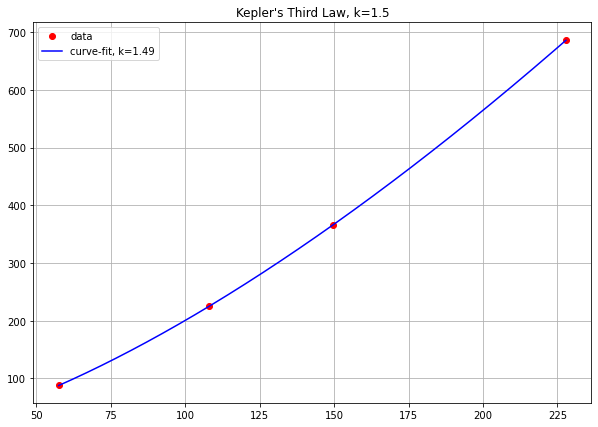

In [7]:
# 可视化
figure = plt.figure(figsize=(10,7))

# 用线性轴展示测量数据
plt.plot(d, T, 'ro',label='data')

# 用线性轴展示拟合曲线
x = np.linspace(np.min(d), np.max(d), 1000)
y = np.exp(k*np.log(x) + C)
plt.plot(x, y, 'b-', label='curve-fit, k=' + f'{k:.2f}')

# 标识 x,y 轴
pass

plt.legend()
plt.title("Kepler's Third Law, k=1.5")
plt.grid('on')
plt.show()

In [8]:
# 可视化
# 用双对数轴展示测量数据
pass

# 用双对数轴展示拟合曲线， 为此产生等比数列的数据
pass


In [9]:
# 取全部8个行星的数据拟合, 并展示结果
pass

2. 质量为 $m=1$ kg 的物体， 在保守力 $F(x)$ 的作用下， 沿 $x$ 轴正向运动 $(x>0)$, 相应的势能是
   $$
   V(x)=\frac{a}{x^2}-\frac{b}{x},\quad x>0
   $$ 
   式中 $x$ 以 $m$ 为单位， 势能以 $J$ 为单位, $a=1$ J$\cdot$m$^2$, $b=2$ J$\cdot$m. 设物体的总能量 $E=-0.50$ J保持不变。 
   (1) 画出物体的势能曲线和力的曲线， 并指出平衡位置；
   (2) 物体的运动被引力束缚在一定范围内， 求出物体的运动范围. 
   (提示： `from scipy.optimize import fsolve`后使用 `fsolve`函数求解非线性方程的根。)

In [10]:
# 第7周-题2

3. (选做) 以地球球心作为坐标原点， 可以证明从地面上发射飞船运动的动力学方程为
   $$\begin{aligned}
   &m\left[\frac{d^2r}{dt^2}-r\left(\frac{d\theta}{dt}\right)^2\right]=-\frac{GM_Em}{r^2}=-\frac{gR_E^2m}{r^2}\\
    &r\frac{d^2\theta}{dt^2}+2\frac{dr}{dt}\frac{d\theta}{dt}=0
   \end{aligned}$$
   其中飞船在极坐标下的坐标为 $(r,\theta)$, $M_E$, $R_E$分别为地球的质量与半径。 $g$ 为地面加速度。 初始时刻飞船处于地面上， 其速度 $\vec{v}$ 方向垂直于径向方向。
   
   为了方便数值求解， 引入约化半径 $r^*$ 与约化时间 $t^*$, 
   $$
   r^*=\frac{r}{R_E},\quad t^*=\sqrt{\frac{R_E}{2g}}
   $$
   则动力学方程可化为
   $$\begin{aligned}
   &\frac{d^2r^*}{d{t^*}^2}-r^*\left(\frac{d\theta}{dt^*}\right)^2=-\frac{1}{{2r^*}^2}\\
    &r^*\frac{d^2\theta}{d{t^*}^2}+2\frac{dr^*}{dt^*}\frac{d\theta}{dt^*}=0
   \end{aligned}
   $$
   并且定义约化径向速度 $v_r^*$ 与约化角速度 $v_\theta^*$ 为
   $$
   v_r^*\equiv\frac{dr^*}{dt^*},\quad v_\theta^*\equiv\frac{d\theta}{dt^*}
   $$
   飞船的初始位置$(r^*_0,\theta_0)=(1,0)$,   飞船的初始速度$(v^*_{r0},v^*_{\theta_0})=(0,v_0/v_{II})$, 其中  $v_{0}$为飞船的发射速度， $v_{II}$ 为第2宇宙速度。 

   (1) 若初始角速度采用如下不同的取值 $v^*_{\theta 0}=0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.05$， 数值计算相应的轨道， 并将结果画在一张图上。
   
   (2) 以 $v^*_{\theta 0}=0.8, 0.9$为例， 验证飞船的机械能守恒， 角动量守恒 (必须取多个周期)。 

In [11]:
# 第7周-题3